# Turbojet Example

This example demonstrates how to use flight-mech to compute the characteristics of a turbojet.

## Imports

In [1]:
# Python imports
import os
import sys
sys.path.append("..")

# Additional imports
import numpy as np
import matplotlib.pyplot as plt

# Flight-Mech imports
from flight_mech.turbine import TurbojetSingleBody

## Turbojet definition

You first need to define the turbojet with its essential quantities.

In [2]:
# Define the turbojet
turbojet = TurbojetSingleBody()

# Set the design inputs
turbojet.compressor_efficiency = 0.86
turbojet.turbine_efficiency = 0.9
turbojet.OPR_design = 10
turbojet.T4_max = 1700  # K

Additionally, you need to set operating conditions.

In [3]:
# Set the operating conditions
turbojet.M0 = 0
turbojet.ambient_pressure = 101325  # Pa
turbojet.ambient_temperature = 285  # K

## Design mode

The turbojet includes two modes, one for which the surface A4* will be considered as a variable and tuned to obtain a desired force. This mode is called the design mode. 

We can now tune its value to obtain the desired thrust, here 7500 N.

In [4]:
# Tune A4* to obtain 7500N of thrust
turbojet.tune_A4_star_for_desired_thrust(7500)
print("A4* at 7500N [m2]:", turbojet.A4_star)

A4* at 7500N [m2]: 0.008131223754882832


## Operation mode

Once the turbojet has been designed, you can switch to the operation mode. This mode allows you to compute the thrust and other quantities of the turbojet in a user-defined configuration.

First let us define the operation conditions and change the mode.

In [5]:
# Define the flight characteristics
cruise_altitude = 11800  # m
cruise_mach = 0.78
max_mach = 0.82
max_altitude = 12500  # m

# Switch to operation mode
turbojet.mode = "operation"

# Set the number of points for the plots
nb_points = 100

### T4 influence

We can now for instance see the influence of a variation of T4 on the thrust. This roughly corresponds to changing the position of the throttle lever.

T3 is negative (-46.39534883720932), the domain is outside its domain of validity.


c:\Users\paulc\Documents\Projets\Flight-Mechanics-Calculator\examples\..\flight_mech\turbine.py:251: RuntimeWarning: invalid value encountered in divide
  W4 = self.W4R * (self.P4 / REFERENCE_PRESSURE) / \
c:\Users\paulc\Documents\Projets\Flight-Mechanics-Calculator\examples\..\flight_mech\turbine.py:264: RuntimeWarning: divide by zero encountered in divide
  * (1 - (self.T5 / self.T4)), GAMMA / (GAMMA - 1))
c:\Users\paulc\Documents\Projets\Flight-Mechanics-Calculator\examples\..\flight_mech\turbine.py:263: RuntimeWarning: invalid value encountered in multiply
  P5 = self.P4 * np.power(1 - (1 / self.turbine_efficiency)
c:\Users\paulc\Documents\Projets\Flight-Mechanics-Calculator\examples\..\flight_mech\turbine.py:251: RuntimeWarning: divide by zero encountered in divide
  W4 = self.W4R * (self.P4 / REFERENCE_PRESSURE) / \
c:\Users\paulc\Documents\Projets\Flight-Mechanics-Calculator\examples\..\flight_mech\turbine.py:310: RuntimeWarning: invalid value encountered in divide
  W8R = self.

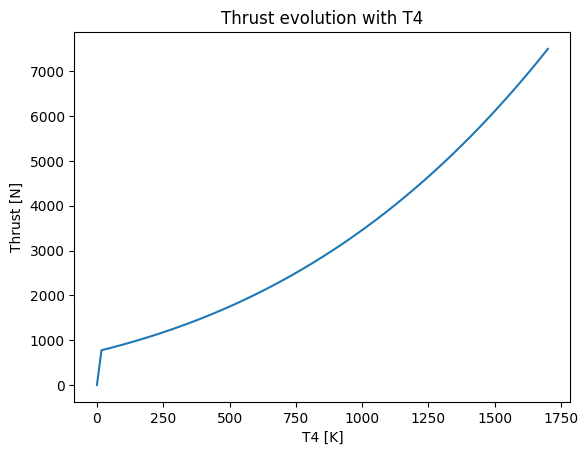

In [6]:
# Compute thrust evolution with T4 instruction
T4_array = np.linspace(0, turbojet.T4_max, nb_points)
thrust_array = np.zeros(nb_points)
for i, T4 in enumerate(T4_array):
    turbojet.T4_instruction = T4
    # Use try block to avoid crash if temperatures become negative
    try:
        turbojet.tune_current_OPR()
        thrust_array[i] = turbojet.thrust
    except Exception as e:
        print(e)

# Plot thrust evolution with velocity
plt.plot(T4_array, thrust_array)
plt.xlabel("T4 [K]")
plt.ylabel("Thrust [N]")
plt.title("Thrust evolution with T4")
plt.show()

### Cruise

Let us now check the thrust obtained in cruise conditions.

In [7]:
# Switch to cruise conditions
# T4 not realistic but to see what happens at full power
turbojet.T4_instruction = turbojet.T4_max
turbojet.altitude = cruise_altitude
turbojet.M0 = cruise_mach

# Compute thrust in cruise
turbojet.tune_current_OPR()
print("cruise thrust [N]:", turbojet.thrust)

cruise thrust [N]: 2527.981077021654


### Velocity influence

The velocity also has an influence on the thrust of the engine.

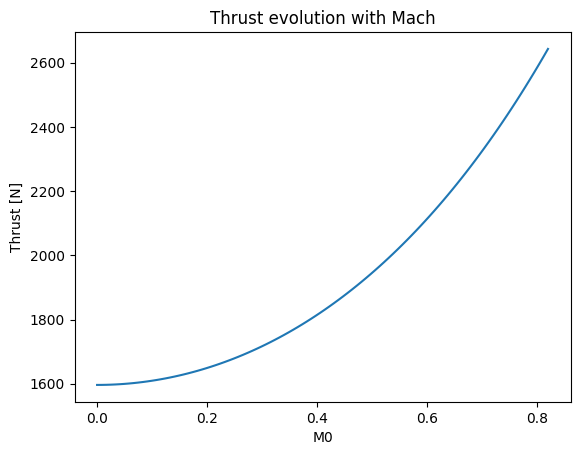

In [8]:
# Compute thrust evolution with velocity
mach_array = np.linspace(0, max_mach, nb_points)
thrust_array = np.zeros(nb_points)
for i, mach in enumerate(mach_array):
    turbojet.M0 = mach
    turbojet.tune_current_OPR()
    thrust_array[i] = turbojet.thrust

# Plot thrust evolution with velocity
plt.plot(mach_array, thrust_array)
plt.xlabel("M0")
plt.ylabel("Thrust [N]")
plt.title("Thrust evolution with Mach")
plt.show()

### Altitude influence

The altitude also has an influence on the thrust of the engine.

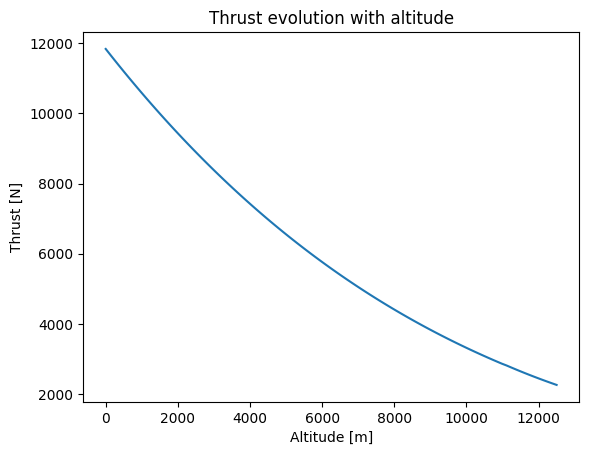

In [9]:
# Compute thrust evolution with altitude
turbojet.M0 = cruise_mach
altitude_array = np.linspace(0, max_altitude, nb_points)
thrust_array = np.zeros(nb_points)
for i, altitude in enumerate(altitude_array):
    turbojet.altitude = altitude
    turbojet.tune_current_OPR()
    thrust_array[i] = turbojet.thrust

# Plot thrust evolution with altitude
plt.plot(altitude_array, thrust_array)
plt.xlabel("Altitude [m]")
plt.ylabel("Thrust [N]")
plt.title("Thrust evolution with altitude")
plt.show()